### 필요한 패키지 불러오기

In [137]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier 
from vecstack import stacking 
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import KFold
from sklearn.metrics import accuracy_score, f1_score, log_loss, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split



import warnings
warnings.filterwarnings('ignore')
import lightgbm as lgb
import pickle

from sklearn.preprocessing import LabelBinarizer

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


In [138]:
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### 데이터 불러오기

In [139]:
train = pickle.load(open("train_merge.pkl", 'rb'))
test = pickle.load(open("test_merge.pkl", 'rb'))

In [140]:
train.tail(10)

,acc_id,label,play_wk_cnt,cnt_dt,play_time,play_cnt_1wk,play_cnt_2wk,play_cnt_3wk,play_cnt_4wk,play_cnt_5wk,play_cnt_6wk,play_cnt_7wk,play_cnt_8wk,npc_exp,npc_hongmun,quest_exp,quest_hongmun,item_hongmun,game_combat_time,get_money,duel_cnt,duel_win,partybattle_cnt,partybattle_win,cnt_enter_inzone_solo,cnt_enter_inzone_light,cnt_enter_inzone_skilled,cnt_enter_inzone_normal,cnt_enter_raid,cnt_enter_raid_light,cnt_enter_bam,cnt_clear_inzone_solo,cnt_clear_inzone_light,cnt_clear_inzone_skilled,cnt_clear_inzone_normal,cnt_clear_raid,cnt_clear_raid_light,cnt_clear_bam,normal_chat,whisper_chat,district_chat,party_chat,guild_chat,faction_chat,cnt_use_buffitem,gathering_cnt,making_cnt,cnt_dt_1wk,cnt_dt_2wk,cnt_dt_3wk,cnt_dt_4wk,cnt_dt_5wk,cnt_dt_6wk,cnt_dt_7wk,cnt_dt_8wk,play_time_1wk,play_time_2wk,play_time_3wk,play_time_4wk,play_time_5wk,play_time_6wk,play_time_7wk,play_time_8wk,npc_exp_1wk,npc_exp_2wk,npc_exp_3wk,npc_exp_4wk,npc_exp_5wk,npc_exp_6wk,npc_exp_7wk,npc_exp_8wk,npc_hongmun_1wk,npc_hongmun_2wk,npc_hongmun_3wk,npc_hongmun_4wk,npc_hongmun_5wk,npc_hongmun_6wk,npc_hongmun_7wk,npc_hongmun_8wk,quest_exp_1wk,quest_exp_2wk,quest_exp_3wk,quest_exp_4wk,quest_exp_5wk,quest_exp_6wk,quest_exp_7wk,quest_exp_8wk,quest_hongmun_1wk,quest_hongmun_2wk,quest_hongmun_3wk,quest_hongmun_4wk,quest_hongmun_5wk,quest_hongmun_6wk,quest_hongmun_7wk,quest_hongmun_8wk,item_hongmun_1wk,item_hongmun_2wk,item_hongmun_3wk,item_hongmun_4wk,item_hongmun_5wk,item_hongmun_6wk,item_hongmun_7wk,item_hongmun_8wk,game_combat_time_1wk,game_combat_time_2wk,game_combat_time_3wk,game_combat_time_4wk,game_combat_time_5wk,game_combat_time_6wk,game_combat_time_7wk,game_combat_time_8wk,get_money_1wk,get_money_2wk,get_money_3wk,get_money_4wk,get_money_5wk,get_money_6wk,get_money_7wk,get_money_8wk,duel_cnt_1wk,duel_cnt_2wk,duel_cnt_3wk,duel_cnt_4wk,duel_cnt_5wk,duel_cnt_6wk,duel_cnt_7wk,duel_cnt_8wk,duel_win_1wk,duel_win_2wk,duel_win_3wk,duel_win_4wk,duel_win_5wk,duel_win_6wk,duel_win_7wk,duel_win_8wk,partybattle_cnt_1wk,partybattle_cnt_2wk,partybattle_cnt_3wk,partybattle_cnt_4wk,partybattle_cnt_5wk,partybattle_cnt_6wk,partybattle_cnt_7wk,partybattle_cnt_8wk,partybattle_win_1wk,partybattle_win_2wk,partybattle_win_3wk,partybattle_win_4wk,partybattle_win_5wk,partybattle_win_6wk,partybattle_win_7wk,partybattle_win_8wk,cnt_enter_inzone_solo_1wk,cnt_enter_inzone_solo_2wk,cnt_enter_inzone_solo_3wk,cnt_enter_inzone_solo_4wk,cnt_enter_inzone_solo_5wk,cnt_enter_inzone_solo_6wk,cnt_enter_inzone_solo_7wk,cnt_enter_inzone_solo_8wk,cnt_enter_inzone_light_1wk,cnt_enter_inzone_light_2wk,cnt_enter_inzone_light_3wk,cnt_enter_inzone_light_4wk,cnt_enter_inzone_light_5wk,cnt_enter_inzone_light_6wk,cnt_enter_inzone_light_7wk,cnt_enter_inzone_light_8wk,cnt_enter_inzone_skilled_1wk,cnt_enter_inzone_skilled_2wk,cnt_enter_inzone_skilled_3wk,cnt_enter_inzone_skilled_4wk,cnt_enter_inzone_skilled_5wk,cnt_enter_inzone_skilled_6wk,cnt_enter_inzone_skilled_7wk,cnt_enter_inzone_skilled_8wk,cnt_enter_inzone_normal_1wk,cnt_enter_inzone_normal_2wk,cnt_enter_inzone_normal_3wk,cnt_enter_inzone_normal_4wk,cnt_enter_inzone_normal_5wk,cnt_enter_inzone_normal_6wk,cnt_enter_inzone_normal_7wk,cnt_enter_inzone_normal_8wk,cnt_enter_raid_1wk,cnt_enter_raid_2wk,cnt_enter_raid_3wk,cnt_enter_raid_4wk,cnt_enter_raid_5wk,cnt_enter_raid_6wk,cnt_enter_raid_7wk,cnt_enter_raid_8wk,cnt_enter_raid_light_1wk,cnt_enter_raid_light_2wk,cnt_enter_raid_light_3wk,cnt_enter_raid_light_4wk,cnt_enter_raid_light_5wk,cnt_enter_raid_light_6wk,cnt_enter_raid_light_7wk,cnt_enter_raid_light_8wk,cnt_enter_bam_1wk,cnt_enter_bam_2wk,cnt_enter_bam_3wk,cnt_enter_bam_4wk,cnt_enter_bam_5wk,cnt_enter_bam_6wk,cnt_enter_bam_7wk,cnt_enter_bam_8wk,cnt_clear_inzone_solo_1wk,cnt_clear_inzone_solo_2wk,cnt_clear_inzone_solo_3wk,cnt_clear_inzone_solo_4wk,cnt_clear_inzone_solo_5wk,cnt_clear_inzone_solo_6wk,cnt_clear_inzone_solo_7wk,cnt_clear_inzone_solo_8wk,cnt_clear_inzone_light_1wk,cnt_clear_inzone_light_2wk,cnt_clear_inzone_light_3wk,cnt_clear_inzone_light_4wk

In [141]:
train.tail(10)

,acc_id,label,play_wk_cnt,cnt_dt,play_time,play_cnt_1wk,play_cnt_2wk,play_cnt_3wk,play_cnt_4wk,play_cnt_5wk,play_cnt_6wk,play_cnt_7wk,play_cnt_8wk,npc_exp,npc_hongmun,quest_exp,quest_hongmun,item_hongmun,game_combat_time,get_money,duel_cnt,duel_win,partybattle_cnt,partybattle_win,cnt_enter_inzone_solo,cnt_enter_inzone_light,cnt_enter_inzone_skilled,cnt_enter_inzone_normal,cnt_enter_raid,cnt_enter_raid_light,cnt_enter_bam,cnt_clear_inzone_solo,cnt_clear_inzone_light,cnt_clear_inzone_skilled,cnt_clear_inzone_normal,cnt_clear_raid,cnt_clear_raid_light,cnt_clear_bam,normal_chat,whisper_chat,district_chat,party_chat,guild_chat,faction_chat,cnt_use_buffitem,gathering_cnt,making_cnt,cnt_dt_1wk,cnt_dt_2wk,cnt_dt_3wk,cnt_dt_4wk,cnt_dt_5wk,cnt_dt_6wk,cnt_dt_7wk,cnt_dt_8wk,play_time_1wk,play_time_2wk,play_time_3wk,play_time_4wk,play_time_5wk,play_time_6wk,play_time_7wk,play_time_8wk,npc_exp_1wk,npc_exp_2wk,npc_exp_3wk,npc_exp_4wk,npc_exp_5wk,npc_exp_6wk,npc_exp_7wk,npc_exp_8wk,npc_hongmun_1wk,npc_hongmun_2wk,npc_hongmun_3wk,npc_hongmun_4wk,npc_hongmun_5wk,npc_hongmun_6wk,npc_hongmun_7wk,npc_hongmun_8wk,quest_exp_1wk,quest_exp_2wk,quest_exp_3wk,quest_exp_4wk,quest_exp_5wk,quest_exp_6wk,quest_exp_7wk,quest_exp_8wk,quest_hongmun_1wk,quest_hongmun_2wk,quest_hongmun_3wk,quest_hongmun_4wk,quest_hongmun_5wk,quest_hongmun_6wk,quest_hongmun_7wk,quest_hongmun_8wk,item_hongmun_1wk,item_hongmun_2wk,item_hongmun_3wk,item_hongmun_4wk,item_hongmun_5wk,item_hongmun_6wk,item_hongmun_7wk,item_hongmun_8wk,game_combat_time_1wk,game_combat_time_2wk,game_combat_time_3wk,game_combat_time_4wk,game_combat_time_5wk,game_combat_time_6wk,game_combat_time_7wk,game_combat_time_8wk,get_money_1wk,get_money_2wk,get_money_3wk,get_money_4wk,get_money_5wk,get_money_6wk,get_money_7wk,get_money_8wk,duel_cnt_1wk,duel_cnt_2wk,duel_cnt_3wk,duel_cnt_4wk,duel_cnt_5wk,duel_cnt_6wk,duel_cnt_7wk,duel_cnt_8wk,duel_win_1wk,duel_win_2wk,duel_win_3wk,duel_win_4wk,duel_win_5wk,duel_win_6wk,duel_win_7wk,duel_win_8wk,partybattle_cnt_1wk,partybattle_cnt_2wk,partybattle_cnt_3wk,partybattle_cnt_4wk,partybattle_cnt_5wk,partybattle_cnt_6wk,partybattle_cnt_7wk,partybattle_cnt_8wk,partybattle_win_1wk,partybattle_win_2wk,partybattle_win_3wk,partybattle_win_4wk,partybattle_win_5wk,partybattle_win_6wk,partybattle_win_7wk,partybattle_win_8wk,cnt_enter_inzone_solo_1wk,cnt_enter_inzone_solo_2wk,cnt_enter_inzone_solo_3wk,cnt_enter_inzone_solo_4wk,cnt_enter_inzone_solo_5wk,cnt_enter_inzone_solo_6wk,cnt_enter_inzone_solo_7wk,cnt_enter_inzone_solo_8wk,cnt_enter_inzone_light_1wk,cnt_enter_inzone_light_2wk,cnt_enter_inzone_light_3wk,cnt_enter_inzone_light_4wk,cnt_enter_inzone_light_5wk,cnt_enter_inzone_light_6wk,cnt_enter_inzone_light_7wk,cnt_enter_inzone_light_8wk,cnt_enter_inzone_skilled_1wk,cnt_enter_inzone_skilled_2wk,cnt_enter_inzone_skilled_3wk,cnt_enter_inzone_skilled_4wk,cnt_enter_inzone_skilled_5wk,cnt_enter_inzone_skilled_6wk,cnt_enter_inzone_skilled_7wk,cnt_enter_inzone_skilled_8wk,cnt_enter_inzone_normal_1wk,cnt_enter_inzone_normal_2wk,cnt_enter_inzone_normal_3wk,cnt_enter_inzone_normal_4wk,cnt_enter_inzone_normal_5wk,cnt_enter_inzone_normal_6wk,cnt_enter_inzone_normal_7wk,cnt_enter_inzone_normal_8wk,cnt_enter_raid_1wk,cnt_enter_raid_2wk,cnt_enter_raid_3wk,cnt_enter_raid_4wk,cnt_enter_raid_5wk,cnt_enter_raid_6wk,cnt_enter_raid_7wk,cnt_enter_raid_8wk,cnt_enter_raid_light_1wk,cnt_enter_raid_light_2wk,cnt_enter_raid_light_3wk,cnt_enter_raid_light_4wk,cnt_enter_raid_light_5wk,cnt_enter_raid_light_6wk,cnt_enter_raid_light_7wk,cnt_enter_raid_light_8wk,cnt_enter_bam_1wk,cnt_enter_bam_2wk,cnt_enter_bam_3wk,cnt_enter_bam_4wk,cnt_enter_bam_5wk,cnt_enter_bam_6wk,cnt_enter_bam_7wk,cnt_enter_bam_8wk,cnt_clear_inzone_solo_1wk,cnt_clear_inzone_solo_2wk,cnt_clear_inzone_solo_3wk,cnt_clear_inzone_solo_4wk,cnt_clear_inzone_solo_5wk,cnt_clear_inzone_solo_6wk,cnt_clear_inzone_solo_7wk,cnt_clear_inzone_solo_8wk,cnt_clear_inzone_light_1wk,cnt_clear_inzone_light_2wk,cnt_clear_inzone_light_3wk,cnt_clear_inzone_light_4wk

### 모델 학습을 위해 선택된 독립변수 리스트

In [205]:
ls= [
    'cnt_dt', 'play_time', 'quest_exp', 'quest_hongmun', 'item_hongmun', 'game_combat_time', 'get_money', 'normal_chat', 'whisper_chat', 'party_chat', 'cnt_clear_inzone_solo',
    'guild_chat', 'cnt_use_buffitem', 'making_cnt', 'play_time_3wk', 'play_time_4wk', 'play_time_5wk', 'play_time_6wk', 'play_time_7wk','play_time_8wk', 
    'play_cnt_1wk', 'play_cnt_2wk', 'play_cnt_3wk', 'play_cnt_4wk', 'play_cnt_5wk', 'play_cnt_6wk', 'play_cnt_7wk', 'npc_exp_7wk', 'npc_exp_8wk', 'npc_hongmun_7wk', 
    'npc_hongmun_8wk', 'quest_exp_8wk', 'quest_hongmun_1wk', 'quest_hongmun_2wk', 'quest_hongmun_6wk','quest_hongmun_7wk', 'quest_hongmun_8wk', 
    'game_combat_time_1wk', 'game_combat_time_2wk', 'game_combat_time_3wk', 'game_combat_time_4wk', 'game_combat_time_5wk', 'game_combat_time_6wk', 
    'game_combat_time_7wk', 'game_combat_time_8wk', 'get_money_5wk', 'get_money_6wk', 'get_money_7wk', 'get_money_8wk', 'normal_chat_8wk', 'party_chat_8wk', 
    'cnt_use_buffitem_6wk', 'cnt_use_buffitem_7wk', 'cnt_use_buffitem_8wk', 'cnt_dt_ratio_78_all', 'play_time_ratio_78_all', 'npc_exp_ratio_78_all',
    'npc_hongmun_ratio_78_all', 'quest_exp_ratio_78_all', 'quest_hongmun_ratio_78_all', 'item_hongmun_ratio_78_all', 'game_combat_time_ratio_78_all',
    'normal_chat_ratio_78_all', 'whisper_chat_ratio_78_all', 'party_chat_ratio_78_all', 'guild_chat_ratio_78_all', 'cnt_use_buffitem_ratio_78_all',
    'making_cnt_ratio_78_all', 'cnt_dt_ratio_2half_all', 'play_time_ratio_2half_all', 'npc_exp_ratio_2half_all', 'npc_hongmun_ratio_2half_all',
    'quest_exp_ratio_2half_all', 'quest_hongmun_ratio_2half_all', 'item_hongmun_ratio_2half_all', 'game_combat_time_ratio_2half_all', 'get_money_ratio_2half_all',
    'normal_chat_ratio_2half_all','whisper_chat_ratio_2half_all', 'guild_chat_ratio_2half_all', 'party_chat_ratio_2half_all', 'cnt_use_buffitem_ratio_2half_all',
    'making_cnt_ratio_2half_all', 'play_time_7834', 'cnt_dt_7834', 'game_combat_time_7834', 'get_money_7834', 'npc_hongmun_7834', 'npc_exp_7834', 
    'cnt_use_buffitem_7834', 'quest_hongmun_7834', 'item_hongmun_7834', 'party_chat_7834', 'normal_chat_7834', 'whisper_chat_7834', 'quest_exp_7834', 
    'guild_chat_7834', 'party_total_member_count','guild_total_member_count','party_cnt', 'party_78_ratio', 'mode_party_start_day', 'pay_amount_std',
    'party_cnt_w8', 'first_party_start_day', 'party_total_retained_minute','degree_cent', 'fix_party_max','shortparty_ratio', 'sell_amount_money', 
    'party_cnt_std', 'guild_size'
    ]
ls_2= [
    'cnt_dt', 'play_time', 'quest_exp', 'quest_hongmun', 'item_hongmun', 'game_combat_time', 'get_money', 'normal_chat', 'whisper_chat', 'party_chat', 'cnt_clear_inzone_solo',
    'guild_chat', 'cnt_use_buffitem', 'making_cnt', 'play_time_3wk', 'play_time_4wk', 'play_time_5wk', 'play_time_6wk', 'play_time_7wk','play_time_8wk', 
    'play_cnt_6wk',  'npc_exp_7wk', 'npc_exp_8wk', 'npc_hongmun_7wk', 
    'npc_hongmun_8wk',  'quest_hongmun_1wk', 'quest_hongmun_2wk', 'quest_hongmun_6wk','quest_hongmun_7wk', 'quest_hongmun_8wk', 
    'game_combat_time_1wk', 'game_combat_time_2wk', 'game_combat_time_3wk', 'game_combat_time_4wk', 'game_combat_time_5wk', 'game_combat_time_6wk', 
    'game_combat_time_7wk', 'game_combat_time_8wk', 'get_money_5wk', 'get_money_6wk', 'get_money_7wk', 'get_money_8wk', 'normal_chat_8wk', 'party_chat_8wk', 
    'cnt_use_buffitem_6wk', 'cnt_use_buffitem_7wk', 'cnt_use_buffitem_8wk', 'cnt_dt_ratio_78_all', 'play_time_ratio_78_all', 'npc_exp_ratio_78_all',
    'npc_hongmun_ratio_78_all', 'quest_exp_ratio_78_all', 'quest_hongmun_ratio_78_all', 'item_hongmun_ratio_78_all', 'game_combat_time_ratio_78_all',
    'normal_chat_ratio_78_all', 'whisper_chat_ratio_78_all', 'party_chat_ratio_78_all', 'guild_chat_ratio_78_all', 'cnt_use_buffitem_ratio_78_all',
    'making_cnt_ratio_78_all', 'cnt_dt_ratio_2half_all', 'play_time_ratio_2half_all', 'npc_exp_ratio_2half_all', 'npc_hongmun_ratio_2half_all',
    'quest_exp_ratio_2half_all', 'quest_hongmun_ratio_2half_all', 'item_hongmun_ratio_2half_all', 'game_combat_time_ratio_2half_all', 'get_money_ratio_2half_all',
    'normal_chat_ratio_2half_all','whisper_chat_ratio_2half_all', 'guild_chat_ratio_2half_all', 'party_chat_ratio_2half_all', 'cnt_use_buffitem_ratio_2half_all',
    'making_cnt_ratio_2half_all', 'play_time_7834', 'cnt_dt_7834', 'game_combat_time_7834', 'get_money_7834', 'npc_hongmun_7834', 'npc_exp_7834', 
    'cnt_use_buffitem_7834', 'quest_hongmun_7834', 'item_hongmun_7834', 'party_chat_7834', 'normal_chat_7834', 'whisper_chat_7834', 'quest_exp_7834', 
    'guild_chat_7834', 'party_total_member_count','guild_total_member_count','party_cnt', 'party_78_ratio', 'mode_party_start_day', 'pay_amount_std',
    'party_cnt_w8', 'party_total_retained_minute','degree_cent', 'fix_party_max','shortparty_ratio', 'sell_amount_money', 
    'party_cnt_std', 'guild_size'
    ]

### Train과 Test를 위한 데이터 

In [143]:
train = shuffle(train, random_state = 42)
le = LabelEncoder()
dfy = train["label"]
le.fit(dfy)
dfy = le.transform(dfy)
y_train = pd.DataFrame(dfy, columns = ['label'])
train = train.drop(['acc_id'], axis=1)
x_train = train 
x_train.drop(['label'], axis=1, inplace=True)

final_pred = test[["acc_id"]]
test = test.drop(["acc_id"], axis=1)
x_test = test 

In [144]:
x_train.tail()

,play_wk_cnt,cnt_dt,play_time,play_cnt_1wk,play_cnt_2wk,play_cnt_3wk,play_cnt_4wk,play_cnt_5wk,play_cnt_6wk,play_cnt_7wk,play_cnt_8wk,npc_exp,npc_hongmun,quest_exp,quest_hongmun,item_hongmun,game_combat_time,get_money,duel_cnt,duel_win,partybattle_cnt,partybattle_win,cnt_enter_inzone_solo,cnt_enter_inzone_light,cnt_enter_inzone_skilled,cnt_enter_inzone_normal,cnt_enter_raid,cnt_enter_raid_light,cnt_enter_bam,cnt_clear_inzone_solo,cnt_clear_inzone_light,cnt_clear_inzone_skilled,cnt_clear_inzone_normal,cnt_clear_raid,cnt_clear_raid_light,cnt_clear_bam,normal_chat,whisper_chat,district_chat,party_chat,guild_chat,faction_chat,cnt_use_buffitem,gathering_cnt,making_cnt,cnt_dt_1wk,cnt_dt_2wk,cnt_dt_3wk,cnt_dt_4wk,cnt_dt_5wk,cnt_dt_6wk,cnt_dt_7wk,cnt_dt_8wk,play_time_1wk,play_time_2wk,play_time_3wk,play_time_4wk,play_time_5wk,play_time_6wk,play_time_7wk,play_time_8wk,npc_exp_1wk,npc_exp_2wk,npc_exp_3wk,npc_exp_4wk,npc_exp_5wk,npc_exp_6wk,npc_exp_7wk,npc_exp_8wk,npc_hongmun_1wk,npc_hongmun_2wk,npc_hongmun_3wk,npc_hongmun_4wk,npc_hongmun_5wk,npc_hongmun_6wk,npc_hongmun_7wk,npc_hongmun_8wk,quest_exp_1wk,quest_exp_2wk,quest_exp_3wk,quest_exp_4wk,quest_exp_5wk,quest_exp_6wk,quest_exp_7wk,quest_exp_8wk,quest_hongmun_1wk,quest_hongmun_2wk,quest_hongmun_3wk,quest_hongmun_4wk,quest_hongmun_5wk,quest_hongmun_6wk,quest_hongmun_7wk,quest_hongmun_8wk,item_hongmun_1wk,item_hongmun_2wk,item_hongmun_3wk,item_hongmun_4wk,item_hongmun_5wk,item_hongmun_6wk,item_hongmun_7wk,item_hongmun_8wk,game_combat_time_1wk,game_combat_time_2wk,game_combat_time_3wk,game_combat_time_4wk,game_combat_time_5wk,game_combat_time_6wk,game_combat_time_7wk,game_combat_time_8wk,get_money_1wk,get_money_2wk,get_money_3wk,get_money_4wk,get_money_5wk,get_money_6wk,get_money_7wk,get_money_8wk,duel_cnt_1wk,duel_cnt_2wk,duel_cnt_3wk,duel_cnt_4wk,duel_cnt_5wk,duel_cnt_6wk,duel_cnt_7wk,duel_cnt_8wk,duel_win_1wk,duel_win_2wk,duel_win_3wk,duel_win_4wk,duel_win_5wk,duel_win_6wk,duel_win_7wk,duel_win_8wk,partybattle_cnt_1wk,partybattle_cnt_2wk,partybattle_cnt_3wk,partybattle_cnt_4wk,partybattle_cnt_5wk,partybattle_cnt_6wk,partybattle_cnt_7wk,partybattle_cnt_8wk,partybattle_win_1wk,partybattle_win_2wk,partybattle_win_3wk,partybattle_win_4wk,partybattle_win_5wk,partybattle_win_6wk,partybattle_win_7wk,partybattle_win_8wk,cnt_enter_inzone_solo_1wk,cnt_enter_inzone_solo_2wk,cnt_enter_inzone_solo_3wk,cnt_enter_inzone_solo_4wk,cnt_enter_inzone_solo_5wk,cnt_enter_inzone_solo_6wk,cnt_enter_inzone_solo_7wk,cnt_enter_inzone_solo_8wk,cnt_enter_inzone_light_1wk,cnt_enter_inzone_light_2wk,cnt_enter_inzone_light_3wk,cnt_enter_inzone_light_4wk,cnt_enter_inzone_light_5wk,cnt_enter_inzone_light_6wk,cnt_enter_inzone_light_7wk,cnt_enter_inzone_light_8wk,cnt_enter_inzone_skilled_1wk,cnt_enter_inzone_skilled_2wk,cnt_enter_inzone_skilled_3wk,cnt_enter_inzone_skilled_4wk,cnt_enter_inzone_skilled_5wk,cnt_enter_inzone_skilled_6wk,cnt_enter_inzone_skilled_7wk,cnt_enter_inzone_skilled_8wk,cnt_enter_inzone_normal_1wk,cnt_enter_inzone_normal_2wk,cnt_enter_inzone_normal_3wk,cnt_enter_inzone_normal_4wk,cnt_enter_inzone_normal_5wk,cnt_enter_inzone_normal_6wk,cnt_enter_inzone_normal_7wk,cnt_enter_inzone_normal_8wk,cnt_enter_raid_1wk,cnt_enter_raid_2wk,cnt_enter_raid_3wk,cnt_enter_raid_4wk,cnt_enter_raid_5wk,cnt_enter_raid_6wk,cnt_enter_raid_7wk,cnt_enter_raid_8wk,cnt_enter_raid_light_1wk,cnt_enter_raid_light_2wk,cnt_enter_raid_light_3wk,cnt_enter_raid_light_4wk,cnt_enter_raid_light_5wk,cnt_enter_raid_light_6wk,cnt_enter_raid_light_7wk,cnt_enter_raid_light_8wk,cnt_enter_bam_1wk,cnt_enter_bam_2wk,cnt_enter_bam_3wk,cnt_enter_bam_4wk,cnt_enter_bam_5wk,cnt_enter_bam_6wk,cnt_enter_bam_7wk,cnt_enter_bam_8wk,cnt_clear_inzone_solo_1wk,cnt_clear_inzone_solo_2wk,cnt_clear_inzone_solo_3wk,cnt_clear_inzone_solo_4wk,cnt_clear_inzone_solo_5wk,cnt_clear_inzone_solo_6wk,cnt_clear_inzone_solo_7wk,cnt_clear_inzone_solo_8wk,cnt_clear_inzone_light_1wk,cnt_clear_inzone_light_2wk,cnt_clear_inzone_light_3wk,cnt_clear_inzone_light_4wk,cnt_clear_in

In [ ]:
x_train = x_train.loc[:,ls] # 1단계 모델을 위한 데이터 프레임
x_test =x_test.loc[:,ls]

In [145]:
l2_train = x_train[:, ls_2] # 2단계 모델을 위한 데이터 프레임
l2_test = x_test[:, ls_2]

In [147]:
x_train.tail()

,cnt_dt,play_time,quest_exp,quest_hongmun,item_hongmun,game_combat_time,get_money,normal_chat,whisper_chat,party_chat,cnt_clear_inzone_solo,guild_chat,cnt_use_buffitem,making_cnt,play_time_3wk,play_time_4wk,play_time_5wk,play_time_6wk,play_time_7wk,play_time_8wk,play_cnt_1wk,play_cnt_2wk,play_cnt_3wk,play_cnt_4wk,play_cnt_5wk,play_cnt_6wk,play_cnt_7wk,npc_exp_7wk,npc_exp_8wk,npc_hongmun_7wk,npc_hongmun_8wk,quest_exp_8wk,quest_hongmun_1wk,quest_hongmun_2wk,quest_hongmun_6wk,quest_hongmun_7wk,quest_hongmun_8wk,game_combat_time_1wk,game_combat_time_2wk,game_combat_time_3wk,game_combat_time_4wk,game_combat_time_5wk,game_combat_time_6wk,game_combat_time_7wk,game_combat_time_8wk,get_money_5wk,get_money_6wk,get_money_7wk,get_money_8wk,normal_chat_8wk,party_chat_8wk,cnt_use_buffitem_6wk,cnt_use_buffitem_7wk,cnt_use_buffitem_8wk,cnt_dt_ratio_78_all,play_time_ratio_78_all,npc_exp_ratio_78_all,npc_hongmun_ratio_78_all,quest_exp_ratio_78_all,quest_hongmun_ratio_78_all,item_hongmun_ratio_78_all,game_combat_time_ratio_78_all,normal_chat_ratio_78_all,whisper_chat_ratio_78_all,party_chat_ratio_78_all,guild_chat_ratio_78_all,cnt_use_buffitem_ratio_78_all,making_cnt_ratio_78_all,cnt_dt_ratio_2half_all,play_time_ratio_2half_all,npc_exp_ratio_2half_all,npc_hongmun_ratio_2half_all,quest_exp_ratio_2half_all,quest_hongmun_ratio_2half_all,item_hongmun_ratio_2half_all,game_combat_time_ratio_2half_all,get_money_ratio_2half_all,normal_chat_ratio_2half_all,whisper_chat_ratio_2half_all,guild_chat_ratio_2half_all,party_chat_ratio_2half_all,cnt_use_buffitem_ratio_2half_all,making_cnt_ratio_2half_all,play_time_7834,cnt_dt_7834,game_combat_time_7834,get_money_7834,npc_hongmun_7834,npc_exp_7834,cnt_use_buffitem_7834,quest_hongmun_7834,item_hongmun_7834,party_chat_7834,normal_chat_7834,whisper_chat_7834,quest_exp_7834,guild_chat_7834,party_total_member_count,guild_total_member_count,party_cnt,party_78_ratio,mode_party_start_day,pay_amount_std,party_cnt_w8,first_party_start_day,party_total_retained_minute,degree_cent,fix_party_max,shortparty_ratio,sell_amount_money,party_cnt_std,guild_size
6265,3,1.551415,3.937341,2.990495,-0.306354,0.952746,-0.023456,-0.034038,-0.231827,-0.275174,-0.306502,-0.343293,2.811487,-0.365536,-0.661677,-0.661677,-0.661677,-0.661677,-0.661677,1.551415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.231874,3.760780,-0.290803,-0.254545,3.937341,-0.487666,-0.487666,-0.487666,-0.487666,2.990495,-0.569842,-0.569842,-0.569842,-0.569842,-0.569842,-0.569842,-0.569842,0.952746,-0.023543,-0.023543,-0.023543,-0.023456,-0.034038,-0.275174,-0.503692,-0.503692,2.811487,1.000000,0.885194,0.931704,0.312334,0.934609,0.922644,0.250000,0.843960,0.250000,0.250000,0.250000,0.25000,0.919250,0.250000,1.00,0.923462,0.954469,0.541556,0.956406,0.948429,0.500000,0.895974,0.500108,0.500000,0.500000,0.500000,0.500000,0.946167,0.500000,2.874770,3,2.092486,0.023629,0.327076,4.224528,3.829705,3.965857,0.310509,0.283815,0.041111,0.256472,4.438188,0.343293,576.0,0.0,6.0,1.000000,6.0,0.000000,6.0,5.0,8794.6,0.008944,5.0,0.9545,-0.095292,2.121320,0
54886,20,-3.941539,-1.502540,-1.975370,-1.838122,-3.419051,-0.141257,-0.204226,-1.390962,-1.651043,-1.839014,-2.059759,-3.022152,-2.193219,-0.654724,-0.656752,-0.656564,-0.657108,-0.661677,-0.659482,0.0,3.0,6.0,4.0,4.0,2.0,0.0,-0.231874,-0.231874,-0.290803,-0.290803,-0.250423,-0.487666,0.462961,-0.487666,-0.487666,-0.487666,-0.569842,-0.569842,-0.569842,-0.569842,-0.569842,-0.569842,-0.569842,-0.569842,-0.023543,-0.023543,-0.023543,-0.023543,-0.034038,-0.275174,-0.503692,-0.503692,-0.503692,0.050000,0.238483,0.250000,0.250000,0.250000,0.074040,0.250000,0.250000,0.250000,0.250000,0.250000,0.25000,0.250000,0.250000,0.35,0.494438,0.500000,0.500000,0.500000,0.148079,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.651994,-9,0.569842,0.023543,0.290803,0.231874,0.503692,0.487666,0.306354,0.275174,0.034038,0.231827,0.250423,0.343293,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,106522.0,0.000000,0.0,0.0000,-0.056346,0.000

In [148]:
x_test.tail()

,cnt_dt,play_time,quest_exp,quest_hongmun,item_hongmun,game_combat_time,get_money,normal_chat,whisper_chat,party_chat,cnt_clear_inzone_solo,guild_chat,cnt_use_buffitem,making_cnt,play_time_3wk,play_time_4wk,play_time_5wk,play_time_6wk,play_time_7wk,play_time_8wk,play_cnt_1wk,play_cnt_2wk,play_cnt_3wk,play_cnt_4wk,play_cnt_5wk,play_cnt_6wk,play_cnt_7wk,npc_exp_7wk,npc_exp_8wk,npc_hongmun_7wk,npc_hongmun_8wk,quest_exp_8wk,quest_hongmun_1wk,quest_hongmun_2wk,quest_hongmun_6wk,quest_hongmun_7wk,quest_hongmun_8wk,game_combat_time_1wk,game_combat_time_2wk,game_combat_time_3wk,game_combat_time_4wk,game_combat_time_5wk,game_combat_time_6wk,game_combat_time_7wk,game_combat_time_8wk,get_money_5wk,get_money_6wk,get_money_7wk,get_money_8wk,normal_chat_8wk,party_chat_8wk,cnt_use_buffitem_6wk,cnt_use_buffitem_7wk,cnt_use_buffitem_8wk,cnt_dt_ratio_78_all,play_time_ratio_78_all,npc_exp_ratio_78_all,npc_hongmun_ratio_78_all,quest_exp_ratio_78_all,quest_hongmun_ratio_78_all,item_hongmun_ratio_78_all,game_combat_time_ratio_78_all,normal_chat_ratio_78_all,whisper_chat_ratio_78_all,party_chat_ratio_78_all,guild_chat_ratio_78_all,cnt_use_buffitem_ratio_78_all,making_cnt_ratio_78_all,cnt_dt_ratio_2half_all,play_time_ratio_2half_all,npc_exp_ratio_2half_all,npc_hongmun_ratio_2half_all,quest_exp_ratio_2half_all,quest_hongmun_ratio_2half_all,item_hongmun_ratio_2half_all,game_combat_time_ratio_2half_all,get_money_ratio_2half_all,normal_chat_ratio_2half_all,whisper_chat_ratio_2half_all,guild_chat_ratio_2half_all,party_chat_ratio_2half_all,cnt_use_buffitem_ratio_2half_all,making_cnt_ratio_2half_all,play_time_7834,cnt_dt_7834,game_combat_time_7834,get_money_7834,npc_hongmun_7834,npc_exp_7834,cnt_use_buffitem_7834,quest_hongmun_7834,item_hongmun_7834,party_chat_7834,normal_chat_7834,whisper_chat_7834,quest_exp_7834,guild_chat_7834,party_total_member_count,guild_total_member_count,party_cnt,party_78_ratio,mode_party_start_day,pay_amount_std,party_cnt_w8,first_party_start_day,party_total_retained_minute,degree_cent,fix_party_max,shortparty_ratio,sell_amount_money,party_cnt_std,guild_size
39995,44,-0.244033,-2.003387,-0.122875,1.494318,-1.426556,-0.141874,0.102582,5.218632,6.638616,-2.452018,11.095475,-2.659046,2.155628,-0.282569,-0.312715,-0.330687,-0.092183,0.424761,-0.227023,7.0,5.0,4.0,5.0,5.0,6.0,7.0,-0.231874,-0.231874,0.620569,-0.196797,-0.250423,0.329969,0.358918,-0.203944,0.194938,-0.259262,0.284401,-0.098611,-0.323379,-0.316628,-0.270697,-0.344424,0.116073,-0.473291,-0.023472,-0.017959,0.007270,-0.023033,-0.034038,-0.240609,-0.449522,-0.314098,-0.487441,0.272727,0.297483,0.250000,0.335966,0.250000,0.241957,0.443279,0.249836,0.147308,0.054604,0.225919,0.224071,0.172746,0.018248,0.522727,0.481077,0.500000,0.532373,0.500000,0.377727,0.653236,0.426657,0.530784,0.376770,0.096016,0.387915,0.377956,0.354670,0.036497,0.793023,3,0.282789,0.030627,0.642917,0.000000,-0.092088,0.175088,1.518643,0.181466,-0.148539,-0.221809,0.000000,0.959144,1207.0,28.0,120.0,0.333333,1.0,1.064353,5.0,1.0,49437.2,0.184261,35,0.4495,5.376375,11.414277,25
39996,50,10.595123,-0.660186,2.633892,4.060014,3.508570,-0.167673,-0.014127,-1.152220,2.901272,-2.452018,5.373495,1.224914,20.782000,1.335542,0.892490,0.929204,1.574332,0.503234,0.678427,7.0,7.0,7.0,5.0,7.0,6.0,5.0,-0.231874,-0.231874,0.646765,0.869991,-0.250423,-0.014920,3.006430,-0.064314,-0.138205,0.121102,1.629084,1.237258,0.694476,-0.118893,0.187737,-0.065815,-0.142056,0.086780,-0.022550,-0.022659,-0.017070,-0.022756,-0.019891,0.688326,-0.200342,-0.276180,-0.021583,0.220000,0.159929,0.068632,0.172108,0.057366,0.152588,0.319291,0.139880,0.173429,0.291918,0.282782,0.317627,0.143183,0.154670,0.480000,0.401012,0.137265,0.393257,0.114731,0.281958,0.629263,0.300687,0.497152,0.362978,0.561480,0.515600,0.579697,0.287324,0.324392,-1.046372,-1,-0.630859,0.001125,-0.556598,-0.646564,-0.492943,0.145291,0.685571,0.017283,-0.120246,0.123227,-0.013600,0.956404,1506.0,30.0,165.0,0.218182,4.0,0.248592,20.0,1.0,12308.1,0.429421,31,0.3293,-0.056

### 1단계 모델 
- 1단계의 각각의 모델은 학습 후 예상값을 반납
- 따라서 S_train, S_test 각 3개의 독립변수가 만들어짐 

In [149]:
models = [RandomForestClassifier(n_jobs = -1, n_estimators = 294, max_depth = None, min_samples_split=5, min_samples_leaf=2, max_features='sqrt',bootstrap=False),
          ExtraTreesClassifier(n_jobs = -1, n_estimators = 1140, min_samples_split = 3, min_samples_leaf = 4, max_features ='sqrt', max_depth = None, bootstrap = False),
          XGBClassifier( n_jobs = -1, learning_rate = 0.1, n_estimators = 800, max_depth = 7)]


In [ ]:
#models = pickle.load(open('stacking_model_level1.pkl', 'rb'))

In [150]:
%%time
S_train, S_test = stacking(models, x_train, y_train, x_test, regression = False, metric = accuracy_score, 
                           n_folds = 4, stratified = True, shuffle = False, random_state = 0, verbose = 2) 


task:         [classification]
n_classes:    [4]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [RandomForestClassifier]
    fold  0:  [0.73976000]
    fold  1:  [0.73464000]
    fold  2:  [0.74396000]
    fold  3:  [0.74040000]
    ----
    MEAN:     [0.73969000] + [0.00332582]
    FULL:     [0.73969000]

model  1:     [ExtraTreesClassifier]
    fold  0:  [0.72616000]
    fold  1:  [0.72480000]
    fold  2:  [0.72956000]
    fold  3:  [0.72756000]
    ----
    MEAN:     [0.72702000] + [0.00176148]
    FULL:     [0.72702000]

model  2:     [XGBClassifier]
    fold  0:  [0.73396000]
    fold  1:  [0.72160000]
    fold  2:  [0.73876000]
    fold  3:  [0.73160000]
    ----
    MEAN:     [0.73148000] + [0.00626054]
    FULL:     [0.73148000]

CPU times: user 2h 59min 13s, sys: 50.3 s, total: 3h 3s
Wall time: 2h 29min 43s


In [151]:
pred_train_dic  = {}
pred_test_dic = {}
for i in range(len(S_train[0])) :
    pred_train_dic["pred"+str(i)] = S_train[:, i]
    pred_test_dic["pred"+str(i)] = S_test[:, i]
S_train = pd.DataFrame(S_train, columns = pred_train_dic.keys())
S_test = pd.DataFrame(S_test, columns = pred_test_dic.keys())  

In [152]:
S_train = pd.concat([S_train, l2_train], axis = 1)
S_test = pd.concat([S_test, l2_test], axis=1)

In [153]:
S_train, S_val_train, y_train, y_val_train = train_test_split(S_train, y_train, test_size=0.1, shuffle = False )

### 2단계 모델
- 1단계 모델을 학습한 데이터에 1단계 모델에서 예측한 값들을 추가하여 2단계 모델을 학습

In [206]:
model = RandomForestClassifier(n_estimators = 1500,
 min_samples_split = 2,
 min_samples_leaf = 4,
 max_features = 'sqrt',
 max_depth = 8,
 bootstrap = False)

In [ ]:
#model = pickle.load(open('stacking_model_level2.pkl', 'rb'))

In [207]:
%%time
model.fit(S_train,y_train)
y_pred = model.predict(S_val_train)

print('Final prediction score: [%.8f]' % accuracy_score(y_val_train, y_pred))

Final prediction score: [0.73640000]
CPU times: user 11min 37s, sys: 2.64 s, total: 11min 39s
Wall time: 16min


In [208]:
print(confusion_matrix(y_val_train, y_pred))

[[1617  328  333  111]
 [ 810 1285  189  243]
 [ 221   81 2147   68]
 [  27  119  106 2315]]


In [209]:
print(classification_report(y_val_train, y_pred, target_names=['2month', 'month', 'retained', 'week']))

             precision    recall  f1-score   support

     2month       0.60      0.68      0.64      2389
      month       0.71      0.51      0.59      2527
   retained       0.77      0.85      0.81      2517
       week       0.85      0.90      0.87      2567

avg / total       0.74      0.74      0.73     10000



In [210]:
y_pred = model.predict(S_test)
y_pred = le.inverse_transform(y_pred)
final_pred["label"] = y_pred

### 최종 예측 결과 

In [211]:
final_pred.tail(10)

,acc_id,label
39990,fff1416cec82334ad7320c466c8d777782cde14beb657a...,retained
39991,fff2f19c372c67e2d3a44b8c3b0d32d27fdcfb69726e56...,2month
39992,fff363c44b1a60d93459051ec89521e01d5b3b161359d3...,month
39993,fff41c80864153b4ce2bb1edf5a7a6ab06a6cb76bd3c62...,2month
39994,fff45547bf54f7a64164ced44f58680e42bad8d08ffa5e...,month
39995,fff8bdad36759f50f58f1bb98f88d4023021779ca74ece...,retained
39996,fff8dfb008a887d5521f29b418e68982e233c27f8fe146...,retained
39997,fff93932cd1c91c38fda78a34b8f238ea395adbbb96e3f...,2month
39998,fffba6445674e1b956dcd28644b55542bd29e44f72847f...,2month
39999,fffd9c46a6762a7d4fdc43026abf75ab1a7b9352818f04...,week


### Feature importances

In [212]:
feature_importances = model.feature_importances_
attri =  list(S_test.columns)
feature_importances_df = pd.DataFrame(sorted(zip(feature_importances, attri), reverse = True))
feature_importances_df

,0,1
0,0.363157,pred0
1,0.323960,pred2
2,0.285894,pred1
3,0.000655,game_combat_time_ratio_78_all
4,0.000604,get_money_ratio_2half_all
5,0.000599,game_combat_time_1wk
6,0.000522,get_money_8wk
7,0.000488,game_combat_time_4wk
8,0.000446,quest_hongmun_6wk
9,0.000424,play_time


In [213]:
groupby_final_pred = final_pred.groupby('label').size().reset_index(name='counts')
groupby_final_pred

,label,counts
0,2month,11838
1,month,6811
2,retained,10724
3,week,10627


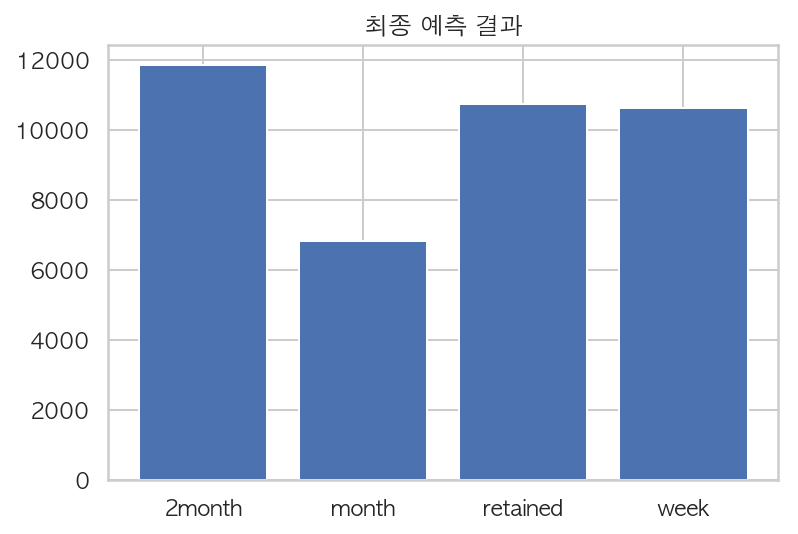

In [214]:
plt.bar(groupby_final_pred['label'], groupby_final_pred['counts'])
plt.title('최종 예측 결과')
plt.show()